<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Remove-Unnecessary-Columns" data-toc-modified-id="Remove-Unnecessary-Columns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Remove Unnecessary Columns</a></span></li><li><span><a href="#Target-feature" data-toc-modified-id="Target-feature-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Target feature</a></span></li><li><span><a href="#Datetime-feature" data-toc-modified-id="Datetime-feature-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Datetime feature</a></span></li><li><span><a href="#Categorical-features" data-toc-modified-id="Categorical-features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Categorical features</a></span><ul class="toc-item"><li><span><a href="#Tags-and-use" data-toc-modified-id="Tags-and-use-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Tags and use</a></span></li><li><span><a href="#Sector" data-toc-modified-id="Sector-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Sector</a></span></li><li><span><a href="#Country" data-toc-modified-id="Country-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Country</a></span></li><li><span><a href="#Create-dummy-or-indicator-features-for-categorical-variables" data-toc-modified-id="Create-dummy-or-indicator-features-for-categorical-variables-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Create dummy or indicator features for categorical variables</a></span></li></ul></li><li><span><a href="#Numeric-features" data-toc-modified-id="Numeric-features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Numeric features</a></span></li><li><span><a href="#Train/Test-split" data-toc-modified-id="Train/Test-split-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train/Test split</a></span></li><li><span><a href="#Scale-the-numeric-features" data-toc-modified-id="Scale-the-numeric-features-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Scale the numeric features</a></span></li><li><span><a href="#Save-processed-data" data-toc-modified-id="Save-processed-data-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Save processed data</a></span></li><li><span><a href="#Optimized-features-and-heatmap" data-toc-modified-id="Optimized-features-and-heatmap-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Optimized features and heatmap</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sns.set()

## Load Data

In [2]:
loans_df = pd.read_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/ProcessedData/loans_others.cvs',parse_dates=['posted_time', 'funded_time'])

In [3]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612393 entries, 0 to 612392
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   id                     612393 non-null  int64         
 1   funded_amount          612393 non-null  float64       
 2   loan_amount            612393 non-null  float64       
 3   activity               612393 non-null  object        
 4   sector                 612393 non-null  object        
 5   use                    612393 non-null  object        
 6   ISO                    612393 non-null  object        
 7   country                612393 non-null  object        
 8   partner_id             612393 non-null  object        
 9   posted_time            612393 non-null  datetime64[ns]
 10  funded_time            574603 non-null  datetime64[ns]
 11  term_in_months         612393 non-null  float64       
 12  lender_count           612393 non-null  int6

In [4]:
loans_df.head()

,id,funded_amount,loan_amount,activity,sector,use,ISO,country,partner_id,posted_time,...,lender_count,tags,borrower_genders,repayment_interval,funded_days,world_region,MPI,funded_speed,loan_amount_per_month,funding_speed
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PAK,Pakistan,With_partner,2014-01-01 06:12:39,...,12,No_tag,female,irregular,1.162419,South Asia,0.230320,258.1,25.0,258.0
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PAK,Pakistan,With_partner,2014-01-01 06:51:08,...,14,No_tag,female,irregular,1.101562,South Asia,0.230320,522.0,52.0,522.0
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IND,India,With_partner,2014-01-01 09:58:07,...,6,"user_favorite, user_favorite",female,bullet,0.252419,South Asia,0.191099,594.3,3.0,594.0
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PAK,Pakistan,With_partner,2014-01-01 08:03:11,...,8,No_tag,female,irregular,0.206123,South Asia,0.230320,970.3,18.0,970.0
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PAK,Pakistan,With_partner,2014-01-01 11:53:19,...,16,No_tag,female,monthly,0.309398,South Asia,0.230320,1292.8,29.0,1293.0


## Remove Unnecessary Columns

Several columns will be removed, including the features that
* don't affect a loan's funding, e.g., `id`
* disclose information from the future, i.e., data leakage, such as `funded_amount`, `funded_time`,`funded_days`, `funded_speed`
* contain redundant information, e.g., `ISO`
* lead to collinearity issue, e.g., `lender_count`
* require a lot of processing to turn into a useful feature, e.g., `activity`

All the features mentioned above will be removed

In [5]:
loans_df = loans_df.drop(columns=['id', 'funded_amount', 'funded_days', 'funded_speed', 'ISO', 'funded_time', 'lender_count', 'activity'])

In [6]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612393 entries, 0 to 612392
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   loan_amount            612393 non-null  float64       
 1   sector                 612393 non-null  object        
 2   use                    612393 non-null  object        
 3   country                612393 non-null  object        
 4   partner_id             612393 non-null  object        
 5   posted_time            612393 non-null  datetime64[ns]
 6   term_in_months         612393 non-null  float64       
 7   tags                   612393 non-null  object        
 8   borrower_genders       612393 non-null  object        
 9   repayment_interval     612393 non-null  object        
 10  world_region           612393 non-null  object        
 11  MPI                    612393 non-null  float64       
 12  loan_amount_per_month  612393 non-null  floa

In [7]:
loans_df.head(1)

,loan_amount,sector,use,country,partner_id,posted_time,term_in_months,tags,borrower_genders,repayment_interval,world_region,MPI,loan_amount_per_month,funding_speed
0,300.0,Food,"To buy seasonal, fresh fruits to sell.",Pakistan,With_partner,2014-01-01 06:12:39,12.0,No_tag,female,irregular,South Asia,0.23032,25.0,258.0


## Target feature

In [8]:
loans_df.funding_speed.describe()

count    612393.000000
mean        146.612378
std        1078.561438
min           0.000000
25%          20.000000
50%          40.000000
75%          92.000000
max      176327.000000
Name: funding_speed, dtype: float64

This project aims to help Kiva make a judgment on whether a loan can get crowd-funded quickly such that Kiva can make a priority. But how fast is fast? That depends on the situation. If Kiva has sufficient funds, the threshold can be low to accept loans application as many as possible; if the funds are limited, might resulting from the decrease in the number of lenders, the threshold must be high enough to make sure the potential lenders are more motivated to lend.

Here, we set the threshold of funding speed at the median, i.e., $42 per day. So the funding speed over 42 will be set as 1, and the funding speed lower than 42 will be 0.

In [9]:
loans_df.loc[loans_df.funding_speed <= 42, 'funding_speed'] = 0
loans_df.loc[loans_df.funding_speed > 42, 'funding_speed'] = 1
loans_df.funding_speed.value_counts()

0.0    317754
1.0    294639
Name: funding_speed, dtype: int64

## Datetime feature

In [10]:
loans_df.posted_time

0        2014-01-01 06:12:39
1        2014-01-01 06:51:08
2        2014-01-01 09:58:07
3        2014-01-01 08:03:11
4        2014-01-01 11:53:19
                 ...        
612388   2017-06-07 01:44:57
612389   2017-06-07 00:35:52
612390   2017-06-07 07:22:29
612391   2017-06-07 10:59:42
612392   2017-06-07 05:55:26
Name: posted_time, Length: 612393, dtype: datetime64[ns]

We will convert the month of `posted_time`, which is a datetime attribute, to categorical attribute, i.e., season: replace December, January, February with Winter; replace March, April, May with Spring; repalce June, July, August with Summer; replace September, October, November to Fall.

In [11]:
# Convert the month to int
loans_df.loc[:, 'posted_season'] = loans_df.posted_time.dt.month%12 // 3

In [12]:
loans_df.posted_season

0         0
1         0
2         0
3         0
4         0
         ..
612388    2
612389    2
612390    2
612391    2
612392    2
Name: posted_season, Length: 612393, dtype: int64

In [13]:
# Convert int to object
season = ['Winter', 'Spring', 'Summer', 'Fall']
for i in range(4):
    loans_df.loc[loans_df.posted_season == i, 'posted_season'] = season[i]

In [14]:
loans_df.posted_season.value_counts()

Spring    185974
Winter    151350
Fall      138701
Summer    136368
Name: posted_season, dtype: int64

In [15]:
loans_df.drop(columns='posted_time', inplace=True)

## Categorical features

In [16]:
loans_df.select_dtypes(include='object').describe()

,sector,use,country,partner_id,tags,borrower_genders,repayment_interval,world_region,posted_season
count,612393,612393,612393,612393,612393,612393,612393,612393,612393
unique,15,382671,70,2,78306,4,4,6,4
top,Agriculture,to buy a water filter to provide safe drinking...,Philippines,With_partner,No_tag,female,monthly,East Asia and the Pacific,Spring
freq,169702,4961,156594,604021,159635,443583,309697,213710,185974


The unique values of `use`, `tags`, `sector`, and `country`, are too many to do modeling.

### Tags and use

In [17]:
loans_df.tags.unique()

array(['No_tag', 'user_favorite, user_favorite',
       '#Elderly, #Woman Owned Biz', ...,
       '#Job Creator, #Vegan, #Woman Owned Biz, #Parent, #Schooling, user_favorite',
       '#Elderly, #Vegan, #Woman Owned Biz, #Repeat Borrower, #Job Creator',
       '#Elderly, #Health and Sanitation, #Technology, #Woman Owned Biz, #Parent, #Biz Durable Asset, user_favorite'],
      dtype=object)

In [18]:
loans_df.use.unique()

array(['To buy seasonal, fresh fruits to sell. ',
       'to repair and maintain the auto rickshaw used in their business.',
       'To repair their old cycle-van and buy another one to rent out as a source of income',
       ...,
       'to cover the plowing costs and to purchase insecticides for cultivating rice.',
       "to buy fertilizer for her crops, and hire workers to help increase her farm's output.",
       'to buy an ultrasonography machine for her clinic.'], dtype=object)

In [19]:
loans_df.loc[loans_df.tags != 'No_tag', 'tags'] = 'With_tag'
loans_df.loc[loans_df.use != 'No_use_info', 'use'] = 'With_use_info'

In [20]:
loans_df.tags.value_counts(normalize=True)

With_tag    0.739326
No_tag      0.260674
Name: tags, dtype: float64

In [21]:
loans_df.use.value_counts(normalize=True)

With_use_info    0.993623
No_use_info      0.006377
Name: use, dtype: float64

About 25% of the loans had no tags while less than 1% of the loans had no use information. So `use` will be removed since it did not add any information to each loan application after. Besides that, the similar but more general information had been provided by `sector`.

In [22]:
loans_df.drop(columns='use', inplace=True)

### Sector

In [23]:
loans_df.sector.value_counts(normalize=True)

Agriculture       0.277113
Food              0.203578
Retail            0.188817
Services          0.062607
Personal Use      0.056384
Housing           0.052292
Clothing          0.047385
Education         0.038872
Transportation    0.023273
Arts              0.015972
Health            0.013339
Manufacturing     0.009463
Construction      0.009082
Wholesale         0.000957
Entertainment     0.000867
Name: sector, dtype: float64

The loans under the sectors of Agriculture, Food, and Retail account for more than 75% of all the loans. The 15 sectors will be grouped to Agriculture, Food, Retail, and Others.

In [24]:
loans_df.loc[loans_df.sector.apply(lambda x: x not in ['Agriculture', 'Food', 'Retail']), 'sector'] = 'Others'

In [25]:
loans_df.sector.value_counts(normalize=True)

Others         0.330492
Agriculture    0.277113
Food           0.203578
Retail         0.188817
Name: sector, dtype: float64

### Country

In [26]:
loans_df.country.value_counts(normalize=True)

Philippines      0.255708
Kenya            0.121110
El Salvador      0.063485
Cambodia         0.054725
Pakistan         0.042358
                   ...   
Namibia          0.000013
Vanuatu          0.000007
Afghanistan      0.000003
Mauritania       0.000002
Cote D'Ivoire    0.000002
Name: country, Length: 70, dtype: float64

The loans from the countries of Philippines, Kenya, El Salvador, Cambodia, and Pakistan account for about 50% of all the loans. The 82 countries will be grouped to Philippines, Kenya, El Salvador, Cambodia, Pakistan, and Others.

In [27]:
loans_df.loc[loans_df.country.apply(lambda x: x not in ['Philippines', 'Kenya', 'El Salvador', 'Cambodia', 'Pakistan']), 'country'] = 'Others'

In [28]:
loans_df.country.value_counts(normalize=True)

Others         0.462613
Philippines    0.255708
Kenya          0.121110
El Salvador    0.063485
Cambodia       0.054725
Pakistan       0.042358
Name: country, dtype: float64

In [29]:
loans_df.select_dtypes(include='object').describe()

,sector,country,partner_id,tags,borrower_genders,repayment_interval,world_region,posted_season
count,612393,612393,612393,612393,612393,612393,612393,612393
unique,4,6,2,2,4,4,6,4
top,Others,Others,With_partner,With_tag,female,monthly,East Asia and the Pacific,Spring
freq,202391,283301,604021,452758,443583,309697,213710,185974


Now the number of unique values of all the categorical variables are acceptable.

### Create dummy or indicator features for categorical variables 

In [30]:
dummy_category = pd.get_dummies(loans_df[['sector','country','borrower_genders','repayment_interval','world_region','posted_season']])

In [31]:
dummy_category_drop_first = pd.get_dummies(loans_df[['partner_id','tags']], drop_first=True)

In [32]:
dummy_category = pd.concat([dummy_category, dummy_category_drop_first], axis=1)

In [33]:
loans_df.columns

Index(['loan_amount', 'sector', 'country', 'partner_id', 'term_in_months',
       'tags', 'borrower_genders', 'repayment_interval', 'world_region', 'MPI',
       'loan_amount_per_month', 'funding_speed', 'posted_season'],
      dtype='object')

In [34]:
loans_df = loans_df.drop(columns=['sector', 'country', 'partner_id','tags', 'borrower_genders', 'repayment_interval', 'world_region','posted_season'])
loans_df = pd.concat([loans_df, dummy_category], axis=1)

In [35]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612393 entries, 0 to 612392
Data columns (total 35 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   loan_amount                               612393 non-null  float64
 1   term_in_months                            612393 non-null  float64
 2   MPI                                       612393 non-null  float64
 3   loan_amount_per_month                     612393 non-null  float64
 4   funding_speed                             612393 non-null  float64
 5   sector_Agriculture                        612393 non-null  uint8  
 6   sector_Food                               612393 non-null  uint8  
 7   sector_Others                             612393 non-null  uint8  
 8   sector_Retail                             612393 non-null  uint8  
 9   country_Cambodia                          612393 non-null  uint8  
 10  country_El Salvador 

## Numeric features

In [36]:
loans_df.select_dtypes(include='float').columns

Index(['loan_amount', 'term_in_months', 'MPI', 'loan_amount_per_month',
       'funding_speed'],
      dtype='object')

In [37]:
numeric_feature = loans_df[['loan_amount', 'term_in_months', 'MPI', 'loan_amount_per_month']]
numeric_feature.describe()

,loan_amount,term_in_months,MPI,loan_amount_per_month
count,612393.000000,612393.000000,612393.000000,612393.000000
mean,757.595368,13.579701,0.124440,67.447404
std,1045.430707,8.617888,0.115893,117.134585
min,25.000000,1.000000,0.001155,0.000000
25%,250.000000,8.000000,0.052128,24.000000
50%,475.000000,13.000000,0.053851,38.000000
75%,900.000000,14.000000,0.187418,65.000000
max,100000.000000,158.000000,0.557405,10000.000000


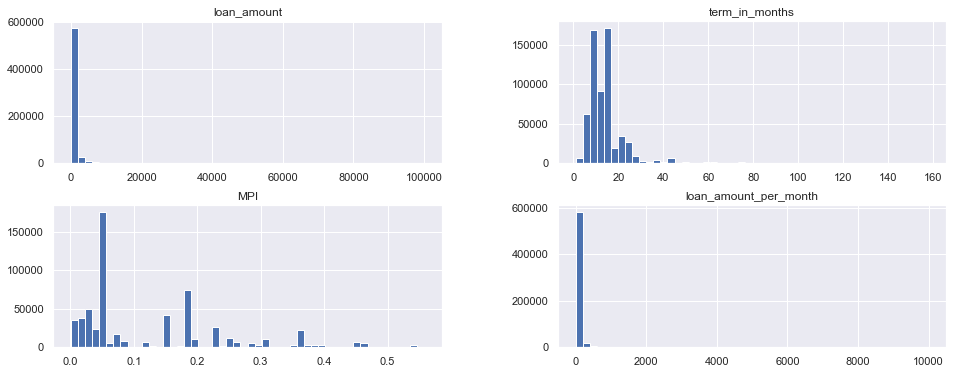

In [38]:
_ = numeric_feature.hist(layout=(2, 2), figsize=(16, 6),sharex=False,sharey=False, bins=50)

As we mentioned in EDA, all these numeric feature are right skewed, among which `loan_amount`, `term_in_months`, and `loan_amount_per_month` had extreme outliers.

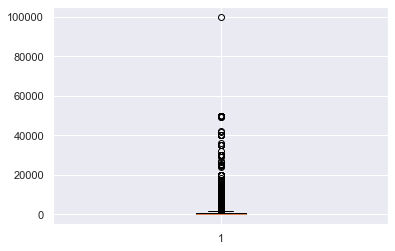

For the feature of loan_amount, the data more than 2850.0 can be considered as extreme outliers.


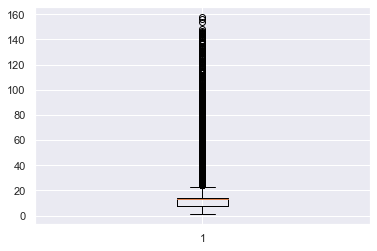

For the feature of term_in_months, the data more than 32.0 can be considered as extreme outliers.


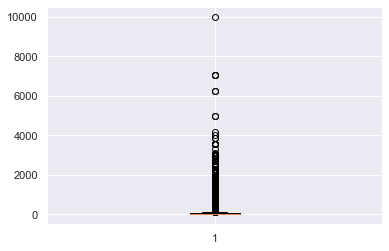

For the feature of loan_amount_per_month, the data more than 188.0 can be considered as extreme outliers.


In [39]:
def outlier(columns):
    for col in columns:
        plt.boxplot(numeric_feature[col])
        plt.show()
        Q1, Q3 = numeric_feature[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        extreme_outlier = Q3 + 3 * IQR
        print('For the feature of {}, the data more than {} can be considered as extreme outliers.'.format(col,extreme_outlier))

outlier(['loan_amount', 'term_in_months', 'loan_amount_per_month'])

558235 0.8623587477890119


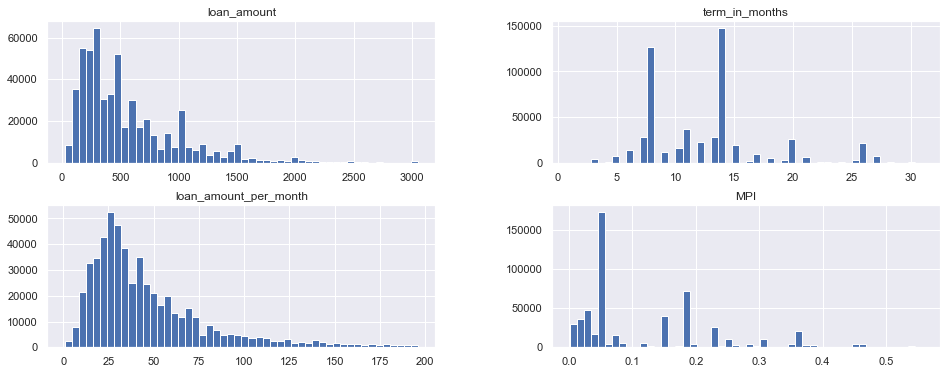

In [40]:
# Drop all the entries which have extreme outliers
loans_df_remove_outlier = loans_df[(loans_df.loan_amount_per_month < 197)  & (loans_df.term_in_months < 32) & (loans_df.loan_amount < 3075)]
print(loans_df_remove_outlier.shape[0], loans_df_remove_outlier.shape[0]/647335)
_ = loans_df_remove_outlier[['loan_amount', 'term_in_months', 'loan_amount_per_month','MPI']].hist(layout=(2, 2), figsize=(16, 6),sharex=False,sharey=False, bins=50)

<div class="burk">
Q1: Remove the extreme outliers?</div><i class="fa fa-lightbulb-o "></i>

<div class="burk">
Q2: Binning, i.e., taking continuous feature and separate it out into several ranges to create a categorical feature?</div><i class="fa fa-lightbulb-o "></i>

## Train/Test split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(loans_df.drop(columns='funding_speed'), 
                                                    loans_df.funding_speed, test_size=0.3, 
                                                    random_state=47)

## Scale the numeric features

In [42]:
numeric_columns = ['loan_amount', 'term_in_months', 'loan_amount_per_month', 'MPI']

scaler = StandardScaler() 
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [43]:
X_train.describe()

,loan_amount,term_in_months,MPI,loan_amount_per_month,sector_Agriculture,sector_Food,sector_Others,sector_Retail,country_Cambodia,country_El Salvador,...,world_region_Europe and Central Asia,world_region_Latin America and Caribbean,world_region_South Asia,world_region_Sub-Saharan Africa,posted_season_Fall,posted_season_Spring,posted_season_Summer,posted_season_Winter,partner_id_With_partner,tags_With_tag
count,4.286750e+05,4.286750e+05,4.286750e+05,4.286750e+05,428675.000000,428675.000000,428675.000000,428675.000000,428675.000000,428675.000000,...,428675.000000,428675.000000,428675.000000,428675.000000,428675.000000,428675.000000,428675.000000,428675.000000,428675.000000,428675.000000
mean,2.927174e-15,-4.870291e-16,1.794241e-15,-8.661383e-17,0.277532,0.203802,0.330267,0.188399,0.054701,0.063696,...,0.062777,0.226839,0.061350,0.272356,0.226512,0.303171,0.223321,0.246996,0.986304,0.739082
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.447782,0.402824,0.470310,0.391031,0.227396,0.244211,...,0.242562,0.418788,0.239971,0.445172,0.418575,0.459629,0.416472,0.431265,0.116225,0.439136
min,-7.005862e-01,-1.462002e+00,-1.063473e+00,-5.669022e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.853755e-01,-6.486560e-01,-6.236666e-01,-3.705151e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-2.701648e-01,-6.769420e-02,-6.087940e-01,-2.509752e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.363443e-01,4.849816e-02,5.436607e-01,-2.043394e-02,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,9.492470e+01,1.678020e+01,3.736022e+00,8.481022e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
X_train.reset_index(drop=True, inplace=True)

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428675 entries, 0 to 428674
Data columns (total 34 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   loan_amount                               428675 non-null  float64
 1   term_in_months                            428675 non-null  float64
 2   MPI                                       428675 non-null  float64
 3   loan_amount_per_month                     428675 non-null  float64
 4   sector_Agriculture                        428675 non-null  uint8  
 5   sector_Food                               428675 non-null  uint8  
 6   sector_Others                             428675 non-null  uint8  
 7   sector_Retail                             428675 non-null  uint8  
 8   country_Cambodia                          428675 non-null  uint8  
 9   country_El Salvador                       428675 non-null  uint8  
 10  country_Kenya       

In [46]:
y_train.reset_index(drop=True, inplace=True)

In [47]:
y_train

0         0.0
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
428670    0.0
428671    1.0
428672    1.0
428673    1.0
428674    0.0
Name: funding_speed, Length: 428675, dtype: float64

## Save processed data

In [48]:
X_train.to_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/ProcessedData/X_train.cvs', index=False)
X_test.to_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/ProcessedData/X_test.cvs', index=False)
y_train.to_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/ProcessedData/y_train.cvs', index=False)
y_test.to_csv('/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Capstone2/ProcessedData/y_test.cvs', index=False)

## Optimized features and heatmap

In [51]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
selector = RFECV(lr, cv=5)
selector.fit(X_train, y_train)
optimized_columns = X_train.columns[selector.support_]

In [52]:
optimized_columns

Index(['loan_amount', 'term_in_months', 'MPI', 'loan_amount_per_month',
       'sector_Food', 'sector_Others', 'sector_Retail', 'country_El Salvador',
       'country_Kenya', 'country_Others', 'country_Pakistan',
       'country_Philippines', 'borrower_genders_female',
       'borrower_genders_male', 'borrower_genders_mixed',
       'borrower_genders_unknown', 'repayment_interval_bullet',
       'repayment_interval_monthly', 'repayment_interval_weekly',
       'world_region_Arab States', 'world_region_East Asia and the Pacific',
       'world_region_Europe and Central Asia',
       'world_region_Latin America and Caribbean',
       'world_region_Sub-Saharan Africa', 'posted_season_Fall',
       'posted_season_Summer', 'posted_season_Winter',
       'partner_id_With_partner', 'tags_With_tag'],
      dtype='object')

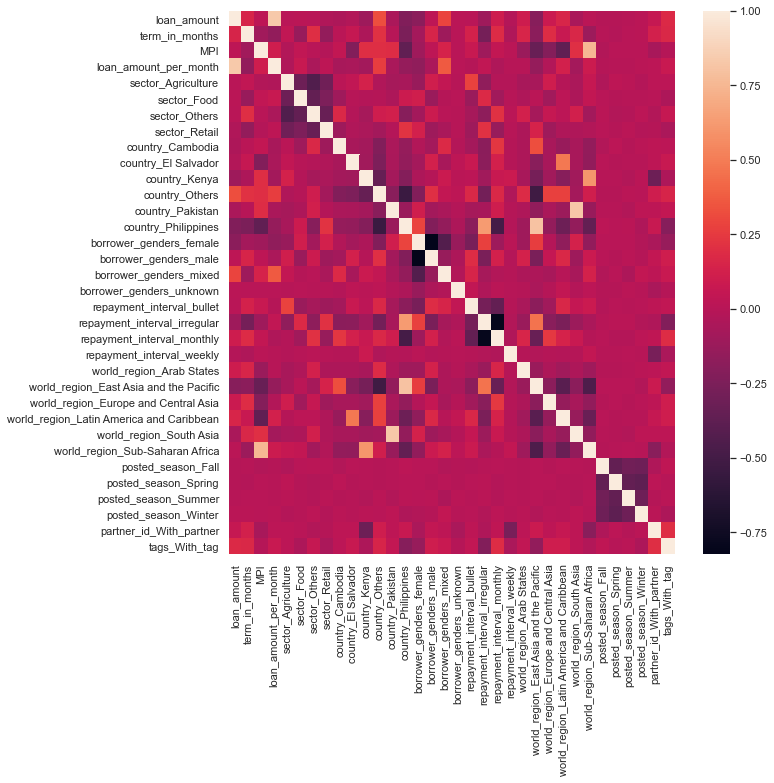

In [54]:
_ = plt.subplots(figsize=(10,10))
sns.heatmap(X_train.corr())